In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
from shapely.geometry import LinearRing
import matplotlib.patheffects as pe
from cartopy.io import shapereader

import sys
sys.path.append('/Users/kenzatazi/Documents/CDT/Code')  # noqa
from load import data_dir

In [3]:

a = pd.read_csv('../../data/processed/historical/historical_CSIRO_RegCM4_1951_1975.csv')
b = pd.read_csv('../../data/processed/historical/historical_CSIRO_RegCM4_1976_2005.csv')
c = pd.read_csv('../../data/bcm_outputs/historical/bcm_historical_CSIRO_RegCM4_1951_2005.csv')
lamb = np.load('../../data/bcm_outputs/historical/lambda_historical_CSIRO_RegCM4_1981_2005.npy')

/var/folders/jn/8my89c2536z23fm0t2l486340000gn/T/ipykernel_59272/515404753.py:14: RuntimeWarning: divide by zero encountered in power
  return y**(lambda_ - 1)/np.sqrt(2*np.pi*var)*np.exp(-((y**lambda_ - 1)/lambda_ - mean)**2/(2*var))/C


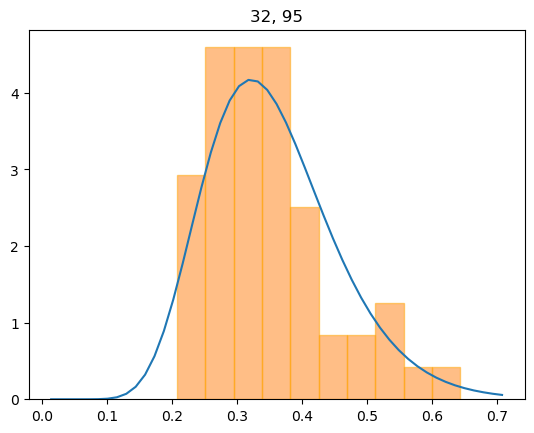

In [4]:
a_interested = a.loc[(a['lat']==32.25)&(a['lon']==95.25)&(a['lon']==95.25)&(a.apply(lambda x: (x['time'].split('-')[1] == '02'), axis=1))]
b_interested = b.loc[(b['lat']==32.25)&(b['lon']==95.25)&(b['lon']==95.25)&(b.apply(lambda x: (x['time'].split('-')[1] == '02'), axis=1))]

tp1 = list(a_interested['tp']) + list(b_interested['tp'])
c_interested = c.loc[(c['lat'] == 32.125)&(c['lon'] == 95.125)&(c['month'] == 2.0)]

var = float(c_interested['var'].iloc[0])
mean = float(c_interested['mean'].iloc[0])

from scipy.special import erf
C = 0.5*(1 + erf((1/lamb + mean)/np.sqrt(2*var)))

def p(y, lambda_, mean, var, C):
    return y**(lambda_ - 1)/np.sqrt(2*np.pi*var)*np.exp(-((y**lambda_ - 1)/lambda_ - mean)**2/(2*var))/C

plt.title(f"32, 95")
x1 = np.linspace(0, 1.1*max(tp1))
y1 = p(x1, lamb, mean, var, C)

plt.plot(x1, y1)
plt.hist(tp1, bins=10, density=True, alpha=0.5, edgecolor='orange');


/var/folders/jn/8my89c2536z23fm0t2l486340000gn/T/ipykernel_59272/767492390.py:17: RuntimeWarning: divide by zero encountered in power
  return y**(lambda_ - 1)/np.sqrt(2*np.pi*var)*np.exp(-((y**lambda_ - 1)/lambda_ - mean)**2/(2*var))/C


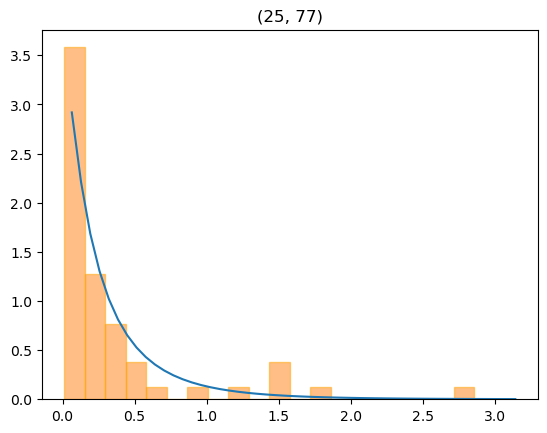

In [5]:
ss = 77
dd = 25

a_interested = a.loc[(a['lat']==dd+.25)&(a['lon']==ss+.25)&(a.apply(lambda x: (x['time'].split('-')[1] == '02'), axis=1))]
b_interested = b.loc[(b['lat']==dd+.25)&(b['lon']==ss+.25)&(b.apply(lambda x: (x['time'].split('-')[1] == '02'), axis=1))]

tp2 = list(a_interested['tp']) + list(b_interested['tp'])
c_interested = c.loc[(c['lat'] == dd+.125)&(c['lon'] == ss+.125)&(c['month'] == 2.0)]

var = float(c_interested['var'].iloc[0])
mean = float(c_interested['mean'].iloc[0])

from scipy.special import erf
C = 0.5*(1 + erf((1/lamb + mean)/np.sqrt(2*var)))

def p(y, lambda_, mean, var, C):
    return y**(lambda_ - 1)/np.sqrt(2*np.pi*var)*np.exp(-((y**lambda_ - 1)/lambda_ - mean)**2/(2*var))/C

x2 = np.linspace(0, 1.1*max(tp2))
y2 = p(x2, lamb, mean, var, C)

plt.title("(25, 77)")
plt.plot(x2, y2)
plt.hist(tp2, bins=20, density=True, alpha=0.5, edgecolor='orange');

In [6]:
a = pd.read_csv('../../data/processed/aphro_1951_2005.csv')

n_lat = 88
n_lon = 200
n_month = 12
n_year = 55

n_lat_rcm = 80
n_lon_rcm = 180


lats = np.array(a['lat']).reshape(n_year, n_month, n_lon, n_lat)[0, 0, 0, :n_lat_rcm]
lons = np.array(a['lon']).reshape(n_year, n_month, n_lon, n_lat)[0, 0, :n_lon_rcm, 0]
months = np.array(a['month']).reshape(n_year, n_month, n_lon, n_lat)[0, :, 0, 0]
years = np.array([int(i.split('-')[0]) for i in list(a['time'])]).reshape(n_year, n_month, n_lon, n_lat)[:, 0, 0, 0]

lats_l = list(lats)
lons_l = list(lons)
months_l = list(months)
years_l = list(years)

i_2005 = years_l.index(2005)

tps = np.array(a['tp']).reshape(n_year, n_month, n_lon, n_lat)[:i_2005+1, :, :n_lon_rcm, :n_lat_rcm]
years_l = years_l[:i_2005+1]
years = years[:i_2005+1]

del a

In [7]:
rcm_data = pd.read_csv(f'../../data/bcm_outputs/historical/bcm_historical_CSIRO_RegCM4_1951_2005.csv')

means = np.full((n_month, n_lon_rcm, n_lat_rcm), np.nan)
vars = np.full((n_month, n_lon_rcm, n_lat_rcm), np.nan)

for i in range(rcm_data.shape[0]):
    i_lat = lats_l.index(rcm_data.iloc[i]['lat'])
    i_lon = lons_l.index(rcm_data.iloc[i]['lon'])
    i_month = months_l.index(rcm_data.iloc[i]['month'])

    mean = np.array(rcm_data.iloc[i]['mean'])
    var = np.array(rcm_data.iloc[i]['var'])

    means[i_month, i_lon, i_lat] = mean
    vars[i_month, i_lon, i_lat] = var

del rcm_data

In [8]:
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, TransformedBbox,
                                                   BboxPatch, BboxConnector)
from matplotlib.patches import Rectangle, ConnectionPatch

In [9]:
ocean_50m = cf.NaturalEarthFeature("physical", "ocean", "50m", edgecolor="darkgrey", facecolor='white')

In [10]:
def indicate_inset(axin, axout, arrow_start=(0, 0), arrow_end=(0, 0)):
    (x0, x1), (y0, y1) = axin.get_xlim(), axin.get_ylim()
    width = x1 - x0
    height = y1 - y0
    
    rect = Rectangle(
        [x0, y0], width=width, height=height, 
        transform=axout.transData, fc='none', ec='orange'
    )
    axout.add_patch(rect)
    
    conn = ConnectionPatch(
        xyA=arrow_start, coordsA=rect.get_transform(),
        xyB=arrow_end, coordsB=axin.transAxes, color='orange',
        arrowstyle='->'
    )
    fig.add_artist(conn)
    return rect, conn

In [11]:
def regional_rectangle(lonmin, lonmax, latmin, latmax, nvert=100):
    """ Return Polygon object to create regional rectangle on maps."""
    lons = np.r_[
        np.linspace(lonmin, lonmin, nvert),
        np.linspace(lonmin, lonmax, nvert),
        np.linspace(lonmax, lonmax, nvert),
    ].tolist()

    lats = np.r_[
        np.linspace(latmin, latmax, nvert),
        np.linspace(latmax, latmax, nvert),
        np.linspace(latmax, latmin, nvert),
    ].tolist()

    pgon = LinearRing(list(zip(lons, lats)))

    return pgon

In [12]:
region_dict2 = {'HMA1': [71.5, 38], 'HMA2': [76.5, 31], 'HMA3': [93.5, 35],}    

In [13]:
hma1 = regional_rectangle(71, 79, 32, 39)
hma2 = regional_rectangle(76, 93, 27, 32)
hma3 = regional_rectangle(93, 103, 28, 36)

In [14]:
# HKH region
hkh_region_path = data_dir + "Shapefiles/hkh/outline.shp"
hkh_region_shape = shapereader.Reader(hkh_region_path)
hkh_region_globe = ccrs.Globe(semimajor_axis=6377276.345, inverse_flattening=300.8017)
hkh_region = ccrs.PlateCarree()

In [15]:
proj = ccrs.PlateCarree()

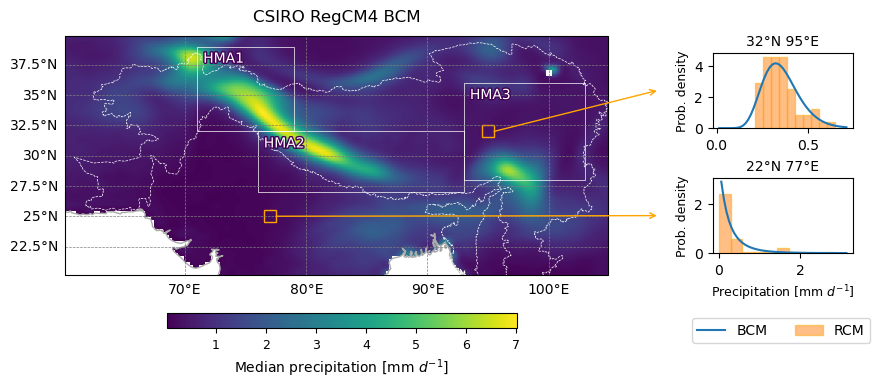

In [ ]:
# fig, ax = plt.subplots(figsize=(4*1.5,3*1.5))

fig, ax = plt.subplots(1, 1, figsize=[7, 5], subplot_kw={'projection': proj})

## Main plot
im = ax.imshow(((lamb*means[1]+1)**(1/lamb)*(0*tps[-1, 1]+1)).T, origin='lower', 
               extent=(min(lons), max(lons), min(lats), max(lats)), zorder=-10)

gl=ax.gridlines(draw_labels=True, linewidth=0.5, linestyle='--', color='gray')
gl.top_labels = False
gl.right_labels = False
ax.add_feature(ocean_50m, zorder=-9)
ax.text(0.5, 1.08, "CSIRO RegCM4 BCM", fontsize=12, transform=ax.transAxes, 
        ha="center", va="center", rasterized=True)

# HKH boundaries
for rec in hkh_region_shape.records():
    ax.add_geometries(
        [rec.geometry],
        hkh_region,
        edgecolor="white",
        facecolor="None",
        linestyle='--',
        linewidth=0.5,
        zorder=-8)

# Mountain boundaries
ax.add_geometries([hma1, hma2, hma3], proj, edgecolor="white",
            facecolor="None", linestyle='-', linewidth=0.5)

# Colorbar
cax = plt.axes([0.27, 0.15, 0.5, 0.03],)
cb=fig.colorbar(im, cax=cax, pad=0., location="bottom", label=r'Median precipitation [mm $d^{-1}$]')
cb.ax.tick_params(labelsize=9)

### Inset 1
axins1 = ax.inset_axes([1.05, 0.55, 0.2, 0.15],
    xlim=(95-0.5, 95+0.5), ylim=(32-0.5, 32+0.5), xticklabels=[], yticklabels=[], transform=fig.transFigure)
axins1.set_axis_off()
axins1.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)
indicate_inset(axins1, ax, arrow_start=(1, 0.5), arrow_end=(-0.4, 0.5))

axinsr1 = fig.add_axes([1.05, 0.55, 0.2, 0.15])
axinsr1.set_title("32°N 95°E", fontsize=10)
axinsr1.plot(x1, y1)
axinsr1.hist(tp1, bins=10, density=True, alpha=0.5, edgecolor='orange')
axinsr1.set_ylabel('Prob. density', fontsize=9)
axinsr1.tick_params(axis='both', which='minor', labelsize=9)
axinsr1.set_yticks([0, 2, 4])

### Inset 2
axins2 = ax.inset_axes([1.05, 0.3, 0.2, 0.15],
    xlim=(77-0.5, 77+0.5), ylim=(25-0.5, 25+0.5), xticklabels=[], yticklabels=[], transform=fig.transFigure)
axins2.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)
axins2.set_axis_off()
indicate_inset(axins2, ax, arrow_start=(1, 0.5), arrow_end=(-0.4, 0.5))

axinsr2 = fig.add_axes([1.05, 0.3, 0.2, 0.15], zorder=10)
axinsr2.set_title("22°N 77°E", fontsize=10)
axinsr2.plot(x2, y2, label='BCM')
axinsr2.hist(tp2, bins=10, density=True, alpha=0.5, edgecolor='orange', label='RCM',)
axinsr2.set_xlabel('Precipitation [mm $d^{-1}$]', fontsize=9)
axinsr2.set_ylabel('Prob. density', fontsize=9)
axinsr2.tick_params(axis='both', which='minor', labelsize=9)

plt.legend(handles=axinsr2.get_legend_handles_labels()[0], 
           loc=(-0.15, -1.2), ncol=2, fontsize=10)

# Text
for region, coord in region_dict2.items():
    ax.text(coord[0], coord[1], region, fontsize=10, color='white', ha='left', va='center', zorder=10, 
            path_effects=[pe.withStroke(linewidth=2, foreground="#440154")]) 


# Rasterize negative zorder
ax.set_rasterization_zorder(0)
plt.savefig('rcm_bcm_hist.pdf', dpi=300, bbox_inches='tight')

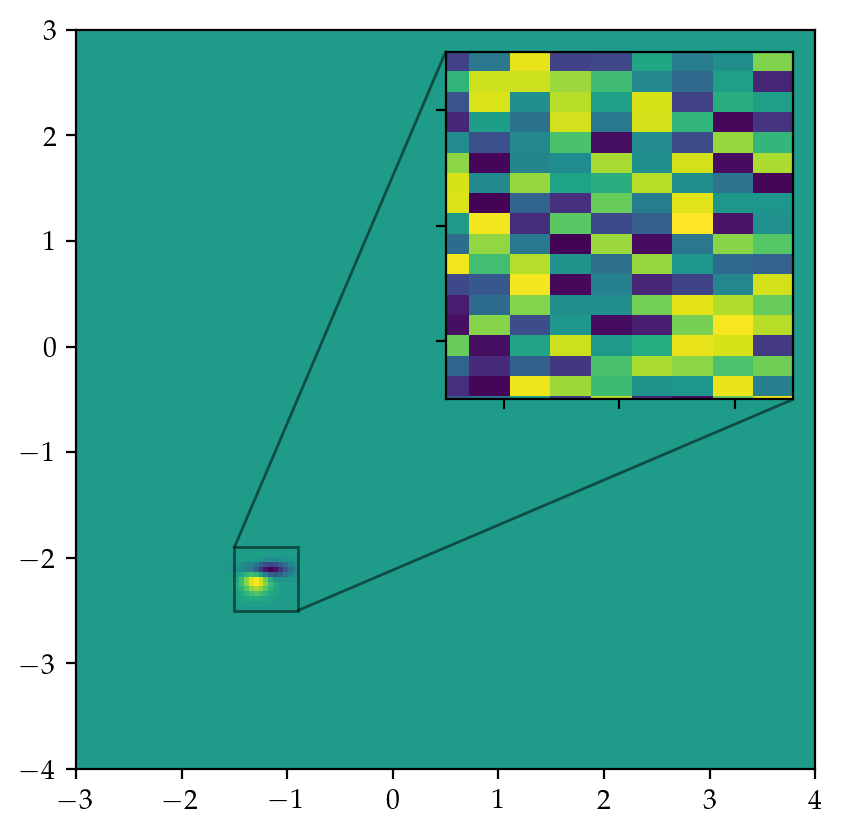

In [19]:
import numpy as np

from matplotlib import cbook
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

# make data
Z = cbook.get_sample_data("axes_grid/bivariate_normal.npy")  # 15x15 array
Z2 = np.zeros((150, 150))
ny, nx = Z.shape
Z2[30:30+ny, 30:30+nx] = Z
extent = (-3, 4, -4, 3)

ax.imshow(Z2, extent=extent, origin="lower")

# inset Axes....
x1, x2, y1, y2 = -1.5, -0.9, -2.5, -1.9  # subregion of the original image
axins = ax.inset_axes(
    [0.5, 0.5, 0.47, 0.47],
    xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
axins.imshow(np.random.rand(200,100), extent=extent, origin="lower")

ax.indicate_inset_zoom(axins, edgecolor="black")

plt.show()